# Лабораторная работа №5.  Нейросети
##  Распознавание лиц с помощью нейросети

Для начала обновим библиотеку для работы с изображениями до той версии, на которой работает то, что нам нужно, хотя и на 8.0.1 все ок.

In [1]:
!pip install --upgrade Pillow==6.1.0


  Using cached Pillow-6.1.0.tar.gz (33.8 MB)
  Running setup.py clean for Pillow
Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.0.1
    Uninstalling Pillow-8.0.1:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Давид\\AppData\\Local\\Temp\\pip-install-hhr1twml\\pillow\\setup.py'"'"'; __file__='"'"'C:\\Users\\Давид\\AppData\\Local\\Temp\\pip-install-hhr1twml\\pillow\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Давид\AppData\Local\Temp\pip-wheel-31jdlo0k'
       cwd: C:\Users\Давид\AppData\Local\Temp\pip-install-hhr1twml\pillow\
  Complete output (177 lines):
  C:\Users\Давид\AppData\Local\Temp\pip-install-hhr1twml\pillow\setup.py:29: RuntimeWarning: Pillow does not yet support Python 3.8 and does not yet provide prebuilt Windows binaries. We do not recommend building from source on Windows.
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creati

In [2]:
!pip install mtcnn
!pip install keras --upgrade


  copying src\PIL\ImImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\ImtImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\IptcImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\Jpeg2KImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\JpegImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\JpegPresets.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\McIdasImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\MicImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\MpegImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\MpoImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\MspImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\PaletteFile.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\PalmImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\PcdImagePlugin.py -> build\lib.win-amd64-3.8\PIL
  copying src\PIL\PcfFontFile.py -> build\lib.win-amd64-3.

Requirement already up-to-date: keras in c:\programdata\anaconda3\lib\site-packages (2.4.3)


 ### С нашей задачей хорошо справляется архитектура VGGFace. Реализуем ее в классах keras.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation, Dense
from tensorflow.python.client import device_lib



from mtcnn import MTCNN
import cv2

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

### Перед тем, как распознавать лицо, нам необходимо решить еще одну задачу машинного зрения - детектирование лица. Для этого функцию детектирования. Скачаем библиотеку mtcnn - в ней содержится модель каскадной архитектуры сверточной нейросети, которая хорошо себя показывает в задачах детектирования объектов на фото.
### P.S. Время- ценный ресурс, поэтому была произведена попытка завести все это на GPU как стандартными методами, так и надстройкой на mtcnn в виде библиотеки FastMTCNN, но скажем спасибо очень понятным инструкциям tenserflow, которые не позволили нормально запустить GPU в данной связке. 
![title](mem/1.jpg)

In [4]:
def extract_face(filename, required_size=(224, 224), resize=False):
    """Функция возвращает массив-лицо и преобразует его к заданному размеру,
    если resize == True
    
    Параметры:
    filename -- строка - путь к файлу с исходным изображением
    required_size -- кортеж из двух целых чисел - размер финального изображения
    resize -- boolean, который определяет, нужно ли менять размер изображения
    
    Возвращает np.ndarray, в котором записано обрезанное изображение с найденным
    на первоначальной картинке лицом
    """
    #pixels = pyplot.imread(filename)
    image = Image.open(filename)
    print(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1,y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    if resize:
        image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

def print_image(img):
    """Выводит изображение на экран"""
    if isinstance(img, str):
        img = pyplot.imread(img)
    pyplot.imshow(img)
    pyplot.show()

### Воспользуемся весами обученной модели из интернетов.
![title](mem/2.jpg)

In [5]:
from tensorflow.keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

### Теперь нам нужно загрузить веса в сетку и зафиксировать их, т.е. сделать так, чтобы при дообучении они не изменялись.

In [6]:
# наш выходной слой с необходимым количеством нейронов в нем
final_layer = Dense(3, activation='softmax')(model.layers[-2].output)

from tensorflow.keras.models import Model
model = Model(model.inputs, final_layer)
for layer in model.layers[:-1]:
    layer.trainable = False

Скомпилируем сетку

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

### Займемся предобработкой изображений.
На вход мы даем по 40 изображений для обучения и по 20 изображений для тестирования. Причем по 10 обычных и 10 в масках.

In [10]:
from matplotlib import pyplot
import PIL 
from PIL  import Image
import numpy as np

In [11]:
import os
dir1 = 'classes/David'
dir2 = 'classes/Nikita'
dir3 = 'classes/Sanya'

dir1t = 'Test/David'
dir2t = 'Test/Nikita'
dir3t = 'Test/Sanya'

files1 = os.listdir(dir1)
files2 = os.listdir(dir2)
files3 = os.listdir(dir3)


files1t = os.listdir(dir1t)
files2t = os.listdir(dir2t)
files3t = os.listdir(dir3t)
print (files1t)

['10.jpg', '13.jpg', '14.jpg', '16.jpg', '17.jpg', '2.jpg', '3.jpg', '4.jpg', '8.jpg']


#### Дисклеймер. Некторые фото были на столько хороши, что пришлось понимать что же происходит 
![title](mem/3.1.jpg)
![title](mem/4.jpg)

In [12]:
images1 = [extract_face(os.path.join(dir1, i), resize=True)
           for i in files1]

classes/David\11.jpg
classes/David\12.jpg
classes/David\18.jpg
classes/David\19.jpg
classes/David\20.jpg
classes/David\21.jpg
classes/David\22.jpg


classes/David\5.jpg
classes/David\6.jpg
classes/David\7.jpg


In [13]:
images2 = [extract_face(os.path.join(dir2, i), resize=True)
           for i in files2]

classes/Nikita\1.jpg
classes/Nikita\10.jpg
classes/Nikita\2.jpg
classes/Nikita\3.jpg
classes/Nikita\4.jpg
classes/Nikita\5.jpg


classes/Nikita\6.jpg
classes/Nikita\7.jpg
classes/Nikita\8.jpg
classes/Nikita\9.jpg


In [14]:
images3 = [extract_face(os.path.join(dir3, i), resize=True)
           for i in files3]

classes/Sanya\1.jpg
classes/Sanya\10.jpg
classes/Sanya\11.jpg
classes/Sanya\12.jpg
classes/Sanya\13.jpg
classes/Sanya\14.jpg


classes/Sanya\2.jpg
classes/Sanya\3.jpg
classes/Sanya\4.jpg
classes/Sanya\5.jpg
classes/Sanya\6.jpg
classes/Sanya\7.jpg


classes/Sanya\8.jpg
classes/Sanya\9.jpg


In [15]:
images1t = [extract_face(os.path.join(dir1t, i), resize=True)
           for i in files1t]

Test/David\10.jpg
Test/David\13.jpg
Test/David\14.jpg
Test/David\16.jpg
Test/David\17.jpg
Test/David\2.jpg


Test/David\3.jpg
Test/David\4.jpg
Test/David\8.jpg


In [16]:
images2t = [extract_face(os.path.join(dir2t, i), resize=True)
           for i in files2t]

Test/Nikita\1.jpg
Test/Nikita\10.jpg
Test/Nikita\2.jpg
Test/Nikita\3.jpg
Test/Nikita\4.jpg
Test/Nikita\5.jpg


Test/Nikita\6.jpg
Test/Nikita\7.jpg
Test/Nikita\8.jpg
Test/Nikita\9.jpg


In [17]:
images3t = [extract_face(os.path.join(dir3t, i), resize=True)
           for i in files3t]

Test/Sanya\1.jpg
Test/Sanya\10.jpg
Test/Sanya\11.jpg
Test/Sanya\12.jpg
Test/Sanya\13.jpg
Test/Sanya\14.jpg


Test/Sanya\15.jpg
Test/Sanya\16.jpg
Test/Sanya\2.jpg
Test/Sanya\3.jpg
Test/Sanya\4.jpg
Test/Sanya\5.jpg


Test/Sanya\6.jpg
Test/Sanya\7.jpg
Test/Sanya\8.jpg
Test/Sanya\9.jpg


In [18]:
X_train = images1 + images2 + images3
y_train = [[1, 0, 0]] * len(images1) + [[0, 1, 0]] * len(images2) + [[0, 0, 1]] * len(images3)

X_test = images1t  + images2t  + images3t
y_test = [[1, 0, 0], [1, 0, 0],  [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]

Обращаем внимание на формат y: если раньше это были просто метки классов, то теперь это список вероятностей принадлежности 
изображения к каждому из имеющихся классов.
### Проведем аугментацию тренировочной выборки

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen

In [20]:
train = train_datagen.flow(np.asarray(X_train), np.asarray(y_train))

### Время обучать сетку


In [21]:
%time
my_model = model.fit(train, epochs=50, verbose=2)

Wall time: 0 ns
Epoch 1/50
2/2 - 14s - loss: 1.0915 - accuracy: 0.3529
Epoch 2/50
2/2 - 11s - loss: 1.0803 - accuracy: 0.5294
Epoch 3/50
2/2 - 11s - loss: 1.0656 - accuracy: 0.4706
Epoch 4/50
2/2 - 10s - loss: 1.0587 - accuracy: 0.4706
Epoch 5/50
2/2 - 10s - loss: 1.0542 - accuracy: 0.6176
Epoch 6/50
2/2 - 10s - loss: 1.0469 - accuracy: 0.7647
Epoch 7/50
2/2 - 10s - loss: 1.0431 - accuracy: 0.6176
Epoch 8/50
2/2 - 10s - loss: 1.0352 - accuracy: 0.7353
Epoch 9/50
2/2 - 11s - loss: 1.0285 - accuracy: 0.7941
Epoch 10/50
2/2 - 10s - loss: 1.0144 - accuracy: 0.6765
Epoch 11/50
2/2 - 11s - loss: 1.0226 - accuracy: 0.5882
Epoch 12/50
2/2 - 10s - loss: 1.0001 - accuracy: 0.6471
Epoch 13/50
2/2 - 10s - loss: 1.0036 - accuracy: 0.7059
Epoch 14/50
2/2 - 10s - loss: 0.9899 - accuracy: 0.7353
Epoch 15/50
2/2 - 10s - loss: 0.9877 - accuracy: 0.7353
Epoch 16/50
2/2 - 10s - loss: 0.9730 - accuracy: 0.8235
Epoch 17/50
2/2 - 10s - loss: 0.9795 - accuracy: 0.7353
Epoch 18/50
2/2 - 10s - loss: 0.9650 - ac

### Сохраняем веса модели

In [22]:
model.save_weights("l5_face_rec_model_weights.h5")

In [23]:
model.load_weights("l5_face_rec_model_weights.h5")

In [24]:
model.predict(np.asarray(X_test))

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [9.9999821e-01, 0.0000000e+00, 1.8434449e-06],
       [1.0000000e+00, 0.0000000e+00, 1.7178641e-20],
       [1.0000000e+00, 0.0000000e+00, 9.8541216e-18],
       [1.0000000e+00, 0.0000000e+00, 6.4320203e-25],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.2283126e-25],
       [2.5940916e-36, 1.0000000e+00, 1.0360544e-11],
       [0.0000000e+00, 1.0000000e+00, 4.8443209e-25],
       [0.0000000e+00, 1.0000000e+00, 3.0483357e-33],
       [0.0000000e+00, 1.0000000e+00, 3.8472689e-13],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.1599567e-15],
       [4.4193739e-34, 1.0000000e+00, 7.5161699e-09],
       [0.0000000e+00, 1.0000000e+00, 8.1796673e-20],
       [0.0000000e+00, 1.988

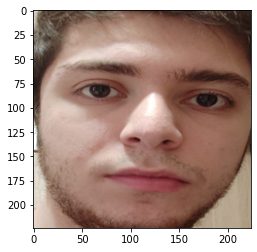

In [36]:
pyplot.imshow(Image.fromarray(X_test[0]))
pyplot.show()


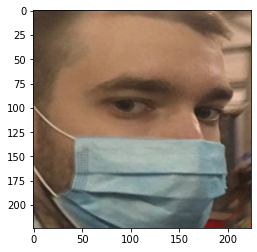

In [31]:
pyplot.imshow(Image.fromarray(X_test[25]))
pyplot.show()

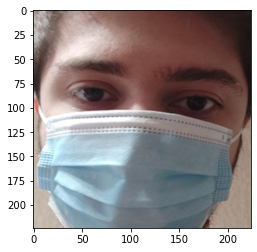

In [34]:
pyplot.imshow(Image.fromarray(X_test[2]))
pyplot.show()


# Вывод
## Ожидание 
![title](mem/5.jpg)
## Реальность
![title](mem/6.jpg)